In [4]:
import pandas as pd
import re
file_encoding = 'cp1252'
df_posts=pd.read_csv(r'C:\Users\kirti\Downloads\MSBA\Text_Analytics\Assignment_2\ta2Q2.csv',header=None)
s_post=df_posts[1]
s_post=s_post[s_post.notnull()]

brand_model = pd.read_csv(r'C:\Users\kirti\Downloads\MSBA\Text_Analytics\Assignment_2\models.csv',encoding=file_encoding)

s_brand=brand_model['brand'].map(lambda x:x.lower())
s_brand=s_brand.map(lambda x:x.replace('.','').replace(',','').replace('-',' '))
s_model=brand_model['model'].map(lambda x:x.lower())
s_model=s_model.map(lambda x:x.replace('?',''))

In [3]:
df_posts

,0,1
0,0,If they keep it around in next four-five years...
1,1,The lease rate is the factor that stops me col...
2,2,"Yes, the completely noncomparable M2 would bea..."
3,3,Why not a Genesis G70 with a manual?
4,4,"Again, the local dealer are hopeless at best(W..."
5,5,Are you talking about Genesis Dealers or Hyund...
6,6,"Thanks, but I am more than aware of the distin..."
7,7,"Yeah, I went once to an AutoNation Lexus store..."
8,8,I am the poster formerly known as benjaminh an...
9,9,Still on the list. Just have not been looking...


In [5]:
import re
s_post_converted=s_post.map(lambda x:x.lower())

for i,m in enumerate(s_model):
    s_post_converted=s_post_converted.map(lambda x:re.sub(str(m), s_brand[i],str(x)))

In [6]:
brands=s_brand.unique()
brands

array(['acura', 'audi', 'bmw', 'buick', 'cadillac', 'car', 'chevrolet',
       'chrysler', 'dodge', 'ford', 'honda', 'hyndai kia', 'hyundai',
       'infiniti', 'kia', 'lincoln', 'mazda', 'mercedes', 'mercedes benz',
       'mercury', 'mitsubishi', 'nissan', 'pontiac', 'problem', 'saturn',
       'seat', 'sedan', 'subaru', 'suzuki', 'toyata', 'toyota',
       'volkswagen', 'volkwagen', 'volvo'], dtype=object)

In [7]:
brands_edited=['acura', 'audi', 'bmw', 'buick', 'cadillac',  'chevrolet',
       'chrysler', 'dodge', 'ford', 'honda', 'hyundai',
       'infiniti', 'kia', 'lincoln', 'mazda', 'mercedes', 
       'mercury', 'mitsubishi', 'nissan', 'pontiac',  'saturn', 'subaru', 'suzuki', 'toyota',
       'volkswagen', 'volvo']

In [8]:
def brand_in_it(brand,post):
    if brand in post:
        return 1
    else: 
        return 0
temp={'post': s_post_converted}
for brand in brands_edited:
    temp[brand]=s_post_converted.map(lambda x:brand_in_it(brand,x))

In [9]:
df2=pd.DataFrame(temp)
s_A=df2.drop('post',axis=1).sum() #A/#B

In [10]:
s_A.sort_values(ascending=False).head(10)

bmw           796
audi          586
acura         319
honda         250
infiniti      178
volkswagen    164
chrysler      152
nissan        151
ford          141
hyundai       130
dtype: int64

In [11]:
def brandAB_in_it(brandA,brandB,post):
    if brandA in post and brandB in post:
        return 1
    else: 
        return 0
temp2={'post': s_post_converted}
for brandA in brands_edited:
    for brandB in brands_edited:
        temp2[brandA+', '+brandB]=s_post_converted.map(lambda x:brandAB_in_it(brandA,brandB,x))

In [12]:
df3=pd.DataFrame(temp2)
df4=df3.drop('post',axis=1)

In [13]:
m_AB=df4.sum().values.reshape([26,26])
df_AB=pd.DataFrame(m_AB)
df_AB.columns=brands_edited
df_AB=df_AB.set_index(pd.Series(brands_edited))
df_AB

,acura,audi,bmw,buick,cadillac,chevrolet,chrysler,dodge,ford,honda,...,mercury,mitsubishi,nissan,pontiac,saturn,subaru,suzuki,toyota,volkswagen,volvo
acura,319,64,61,8,12,5,49,3,10,80,...,1,1,13,4,3,6,0,10,10,11
audi,64,586,138,6,23,3,23,11,18,33,...,0,0,26,5,0,11,0,15,55,15
bmw,61,138,796,6,27,12,10,11,32,43,...,2,0,33,8,0,9,0,18,18,17
buick,8,6,6,45,9,8,3,3,5,4,...,2,0,2,2,0,1,0,8,1,4
cadillac,12,23,27,9,118,7,5,3,9,6,...,0,1,2,1,0,3,0,7,4,6
chevrolet,5,3,12,8,7,73,7,7,9,2,...,0,0,8,3,0,5,0,6,4,2
chrysler,49,23,10,3,5,7,152,6,9,33,...,0,0,1,2,1,1,0,6,3,5
dodge,3,11,11,3,3,7,6,99,6,3,...,0,0,2,0,1,3,0,4,1,3
ford,10,18,32,5,9,9,9,6,141,18,...,1,0,5,2,0,7,0,12,20,4
honda,80,33,43,4,6,2,33,3,18,250,...,1,0,18,1,1,5,0,31,19,3


In [15]:
N=len(s_post)
df_lift=df_AB.copy()
for i in range(26):
    for j in range(26):
        df_lift.iloc[i,j]=N*df_AB.iloc[i,j]/(s_A[i]*s_A[j])
df_lift

,acura,audi,bmw,buick,cadillac,chevrolet,chrysler,dodge,ford,honda,...,mercury,mitsubishi,nissan,pontiac,saturn,subaru,suzuki,toyota,volkswagen,volvo
acura,15.661442,1.710465,1.200186,2.784256,1.592689,1.072702,5.048754,0.474589,1.110741,5.011661,...,3.915361,3.915361,1.348336,1.566144,5.873041,1.269847,0.0,1.373811,0.954966,2.533469
audi,1.710465,8.525597,1.478056,1.136746,1.661769,0.350367,1.290057,0.947289,1.088374,1.125379,...,0.000000,0.000000,1.467984,1.065700,0.000000,1.267319,0.0,1.121789,2.859194,1.880646
bmw,1.200186,1.478056,6.276382,0.836851,1.436121,1.031734,0.412920,0.697376,1.424427,1.079538,...,3.138191,0.000000,1.371660,1.255276,0.000000,0.763344,0.0,0.991008,0.688871,1.569095
buick,2.784256,1.136746,0.836851,111.022222,8.467797,12.166819,2.191228,3.364310,3.936958,1.776356,...,55.511111,0.000000,1.470493,5.551111,0.000000,1.500300,0.0,7.791033,0.676965,6.530719
cadillac,1.592689,1.661769,1.436121,8.467797,42.338983,4.059902,1.392730,1.282999,2.702488,1.016136,...,0.000000,10.584746,0.560781,1.058475,0.000000,1.716445,0.0,2.599762,1.032658,3.735793
chevrolet,1.072702,0.350367,1.031734,12.166819,4.059902,68.438356,3.151766,4.839076,4.368406,0.547507,...,0.000000,0.000000,3.625873,5.132877,0.000000,4.624213,0.0,3.602019,1.669228,2.012893
chrysler,5.048754,1.290057,0.412920,2.191228,1.392730,3.151766,32.868421,1.992026,2.097984,4.338632,...,0.000000,0.000000,0.217672,1.643421,4.108553,0.444168,0.0,1.729917,0.601252,2.416796
dodge,0.474589,0.947289,0.697376,3.364310,1.282999,4.839076,1.992026,50.464646,2.147432,0.605576,...,0.000000,0.000000,0.668406,0.000000,6.308081,2.045864,0.0,1.770689,0.307711,2.226381
ford,1.110741,1.088374,1.424427,3.936958,2.702488,4.368406,2.097984,2.147432,35.432624,2.551149,...,8.858156,0.000000,1.173266,1.771631,0.000000,3.351735,0.0,3.729750,4.321052,2.084272
honda,5.011661,1.125379,1.079538,1.776356,1.016136,0.547507,4.338632,0.605576,2.551149,19.984000,...,4.996000,0.000000,2.382199,0.499600,2.498000,1.350270,0.0,5.434246,2.315220,0.881647


In [16]:
df_lift_r=1/df_lift

In [17]:
for i in range(26):
    df_lift_r.iloc[i,i]=0

In [18]:
df_lift_r

,acura,audi,bmw,buick,cadillac,chevrolet,chrysler,dodge,ford,honda,...,mercury,mitsubishi,nissan,pontiac,saturn,subaru,suzuki,toyota,volkswagen,volvo
acura,0.000000,0.584636,0.833204,0.359162,0.627869,0.932226,0.198069,2.107086,0.900300,0.199535,...,0.255404,0.255404,0.741655,0.638511,0.170270,0.787497,inf,0.727902,1.047158,0.394716
audi,0.584636,0.000000,0.676564,0.879704,0.601768,2.854150,0.775159,1.055645,0.918802,0.888590,...,inf,inf,0.681207,0.938351,inf,0.789068,inf,0.891433,0.349749,0.531732
bmw,0.833204,0.676564,0.000000,1.194956,0.696320,0.969242,2.421777,1.433947,0.702037,0.926322,...,0.318655,inf,0.729044,0.796637,inf,1.310026,inf,1.009074,1.451650,0.637310
buick,0.359162,0.879704,1.194956,0.000000,0.118094,0.082191,0.456365,0.297238,0.254003,0.562950,...,0.018014,inf,0.680044,0.180144,inf,0.666533,inf,0.128353,1.477182,0.153122
cadillac,0.627869,0.601768,0.696320,0.118094,0.000000,0.246311,0.718014,0.779424,0.370029,0.984121,...,inf,0.094476,1.783227,0.944756,inf,0.582599,inf,0.384651,0.968375,0.267681
chevrolet,0.932226,2.854150,0.969242,0.082191,0.246311,0.000000,0.317282,0.206651,0.228916,1.826461,...,inf,inf,0.275796,0.194823,inf,0.216253,inf,0.277622,0.599079,0.496797
chrysler,0.198069,0.775159,2.421777,0.456365,0.718014,0.317282,0.000000,0.502002,0.476648,0.230487,...,inf,inf,4.594075,0.608487,0.243395,2.251401,inf,0.578062,1.663197,0.413771
dodge,2.107086,1.055645,1.433947,0.297238,0.779424,0.206651,0.502002,0.000000,0.465673,1.651321,...,inf,inf,1.496097,inf,0.158527,0.488791,inf,0.564752,3.249800,0.449159
ford,0.900300,0.918802,0.702037,0.254003,0.370029,0.228916,0.476648,0.465673,0.000000,0.391980,...,0.112890,inf,0.852322,0.564452,inf,0.298353,inf,0.268114,0.231425,0.479784
honda,0.199535,0.888590,0.926322,0.562950,0.984121,1.826461,0.230487,1.651321,0.391980,0.000000,...,0.200160,inf,0.419780,2.001601,0.400320,0.740592,inf,0.184018,0.431924,1.134241


### MDS

In [19]:
m_lift=df_lift_r.values

In [20]:
from sklearn import manifold
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import sklearn

MDS_cars = sklearn.manifold.MDS(n_components=2, metric=True, dissimilarity='precomputed')

dissimilarity = df_lift_r.replace([np.inf, -np.inf], np.nan)
dissimilarity.fillna(999, inplace=True)
npos = MDS_cars.fit_transform(dissimilarity)

seed = np.random.RandomState(seed=99)
mds = manifold.MDS(n_components=2, max_iter=20000, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
x_mds= mds.fit(dissimilarity).embedding_
#N = m_lift.shape[0]
#print('original distance','\tnew distance')
#for i in range(N):
#    for j in range(i+1,N):
#        print(np.str(m_lift[i,j]),'\t\t',np.str("%.4f"%np.linalg.norm(x_mds[i]-x_mds[j])))

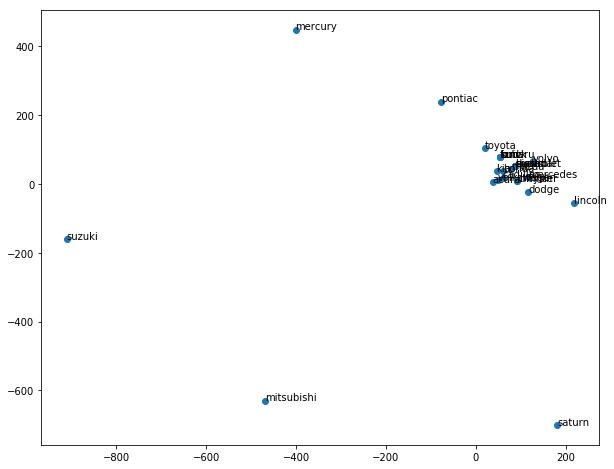

In [21]:
fig = plt.figure(figsize=(10, 8))
x=x_mds[:,0]
y=x_mds[:,1]
label=df_lift.columns.values
plt.scatter(x, y)
for i in range(26):
    plt.text(x[i]-0.02,y[i]+0.03,label[i])
plt.show()

## task C brand - attributes

In [26]:
import pandas as pd
import re
df_posts=pd.read_csv(r'C:\Users\kirti\Downloads\MSBA\Text_Analytics\Assignment_2\ta2Q2.csv',header=None)
s_post=df_posts[1]
s_post=s_post[s_post.notnull()]

brands = ['acura', 'audi', 'bmw', 'buick', 'cadillac',  'chevrolet',
       'chrysler', 'dodge', 'ford', 'honda', 'hyundai',
       'infiniti', 'kia', 'lincoln', 'mazda', 'mercedes',
       'mercury', 'mitsubishi', 'nissan', 'pontiac',  'saturn', 'subaru', 'suzuki', 'toyota',
       'volkswagen', 'volvo']

brand_model = pd.read_csv(r'C:\Users\kirti\Downloads\MSBA\Text_Analytics\Assignment_2\models.csv',encoding=file_encoding)
s_brand=brand_model['brand'].map(lambda x:x.lower())
s_brand=s_brand.map(lambda x:x.replace('.','').replace(',','').replace('-',' '))
s_model=brand_model['model'].map(lambda x:x.lower())
s_model=s_model.map(lambda x:x.replace('?',''))

sub_super=pd.read_csv('sub_super.csv')
attribute_dict = dict(zip(sub_super.iloc[:,0], sub_super.iloc[:,1]))

In [27]:
import re
s_post_converted=s_post.map(lambda x:x.lower())

for i,m in enumerate(s_model):
    s_post_converted=s_post_converted.map(lambda x:re.sub(str(m), s_brand[i],str(x)))

In [32]:
def remove_pun(text):
    '''remove all those punctuations'''
    #s=posts_nostp[352][44:46]
    #pun=['.',',',';',':','\\','?','(',')','-','"','/',s,'\'s']
    pun=['.',',',';',':','\\','?','(',')','-','"','/','\'s']
    for p in pun:
        text=text.replace(p,' ')
    for brand in brands:
        text=text.replace(brand,' '+brand+' ')
    return text

posts_nopun=s_post_converted.map(lambda x:remove_pun(str(x)))

In [33]:
from nltk.corpus import stopwords

def remove_stp(text):
    '''remove stopwords'''
    stp_removed = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return stp_removed

posts_nostp=posts_nopun.map(lambda x:remove_stp(x))

In [34]:
# first check if a brand in a text and import re
def find_idx(brand, text): 
    ''' find the indexs of a brand in a post;
        check if a brand in a post first,
        and need to import re'''
    total_count=len(re.findall(brand,text))
    token=text.split()
    idx_temp = token.index(brand)
    idx=idx_temp
    idx_list=[idx]
    count=1
    while idx<len(token) and count<total_count:
        idx_temp = token[idx+1:].index(brand)
        idx=idx+idx_temp+1
        idx_list.append(idx) 
        count+=1
    return idx_list

In [35]:
def features(brand,text):
    '''find feature list for a brand in a post'''
    idx_list=find_idx(brand,text)
    token=text.split()
    feature_list=[]
    for i in idx_list:
        feature_list=feature_list+token[max(0,i-5):i]+token[i+1:min(i+6,len(token))]
    return feature_list

In [36]:
def find_attr_unique(brand, text):
    '''find the unique general attribute in a post for a brand'''
    if brand in text:
        f=features(brand, text)
        attribute=pd.Series([attribute_dict.get(w) for w in f])
        attribute=attribute[attribute.notnull()]
        result=list(attribute.unique()) # should we take unique? or not
    else:
        result=[]
    return result

In [37]:
def find_attr_notunique(brand, text):
    '''find the unique general attribute in a post for a brand'''
    if brand in text:
        f=features(brand, text)
        attribute=pd.Series([attribute_dict.get(w) for w in f])
        attribute=attribute[attribute.notnull()]
        result=list(attribute) # should we take unique? or not
    else:
        result=[]
    return result

In [38]:
# find the top 5 most frequently mentioned attributes
def find_total_attr(text):
    '''find any atribute mentioned in a post'''
    attribute=pd.Series([attribute_dict.get(w) for w in text.split()])
    attribute=attribute[attribute.notnull()]
    return list(attribute)

total_attr=posts_nostp.map(lambda x:find_total_attr(x)).sum()
pd.Series(total_attr).value_counts()

sentiment      2689
build          1465
interior        592
function        515
issues          411
reliability     410
price           392
body            298
dtype: int64

In [39]:
# find the top 5 most frequently mentioned attributes associated with a brand
# top 5 brand: bmw, toyota, audi, honda, acura
top_brand=['bmw','toyota','audi','honda','acura']
attr_unique={}
attr_notunique={}
for brand in top_brand:
    attr_unique[brand]=posts_nostp.map(lambda x:find_attr_unique(brand,x))
    attr_notunique[brand]=posts_nostp.map(lambda x:find_attr_notunique(brand,x))

In [40]:
s_bmw=pd.Series(attr_unique['bmw'].sum()).value_counts()
s_toyota=pd.Series(attr_unique['toyota'].sum()).value_counts()
s_audi=pd.Series(attr_unique['audi'].sum()).value_counts()
s_honda=pd.Series(attr_unique['honda'].sum()).value_counts()
s_acura=pd.Series(attr_unique['bmw'].sum()).value_counts()
df_unique=pd.concat((s_bmw,s_toyota,s_audi,s_honda,s_acura),axis=1,sort=False)
df_unique.columns=top_brand

In [42]:
s2_bmw=pd.Series(attr_notunique['bmw'].sum()).value_counts()
s2_toyota=pd.Series(attr_notunique['toyota'].sum()).value_counts()
s2_audi=pd.Series(attr_notunique['audi'].sum()).value_counts()
s2_honda=pd.Series(attr_notunique['honda'].sum()).value_counts()
s2_acura=pd.Series(attr_notunique['bmw'].sum()).value_counts()
df_notunique=pd.concat((s2_bmw,s2_toyota,s2_audi,s2_honda,s2_acura),axis=1,sort=False)
df_notunique.columns=top_brand

In [43]:
df_notunique

,bmw,toyota,audi,honda,acura
sentiment,215,56,220,93,215
build,148,20,131,37,148
function,45,3,38,9,45
interior,31,7,31,19,31
price,29,10,23,14,29
issues,28,8,25,13,28
reliability,25,16,28,17,25
body,20,5,27,11,20


## Aspiration Task D

Before you girls start going through this
Here is some context
I've chosen only bigrams like wish to,love to, dream car... and so on. Feel free to add more bigrams if you like to indicate aspiration.
Secondly, we are approaching the problem in the following way:
The question requires us to find the most aspirational brands, here we are taking into account aspirational bigrams mentioned above and calculating the lift between them and the brands in each post. The brand with the highest lift indicates a larger aspiration rate

Calculation of lift:
As you know 
Lift = P(A,B)/(P(A) * P(B)) = (n(A,B) * N)/ (n(A) * n(B))
In our case,
A -> Brand
B -> Aspiration words
N -> number of posts
P(A,B) = n(A,B)/N
n(A,B) -> number of posts for each brand which indicates aspiration
P(A) ->n(A)/N
n(A) -> number of posts which have a brand influence
P(B) ->n(B)/N
n(B) -> For each brand,the number of brands which indicate aspiration to buy the car!


In [240]:
#filterv and filterv2 have the aspirational bigram combinations
filterv = ['love','hope','want','wish','dream','desire','crave','buy','purchase','wanted','always']
filterv2 = ['to','have','car','it','of','this']
filter_set = set(filterv)
filter_set2 = set(filterv2)

#function to return the occurence of aspirtaional bigrams for every brand
def find(brand,text):
    list_bg = []
    if(brand in text):
        f=features(brand,text)
        bg = list(zip(*[f[i:] for i in range(2)]))
        for i,j in enumerate(bg):
                if(len(j) != 0):
                    if((j[0] in filter_set) & (j[1] in filter_set2)):
                        list_bg.append(j)
        return len(list_bg)

In [246]:
brand_asp = {}
for brand in brands:
    brand_asp[brand] = posts_nopun.map(lambda x: find(brand,x))

In [247]:
#Creating a dataframe to calculate number of posts with aspirations for every brand(asp_brand) 
#and number of posts with aspirations

asp_table = pd.DataFrame(columns = brands)
for brand in brands:
    asp_table[brand]=brand_asp[brand]
asp_table = asp_table.fillna(0)

asp_entries = asp_table.sum(axis=1)
asp_brand = asp_table[asp_table > 0].count(axis = 0)
no_asp = 0
for i in asp_entries.iteritems():
    if(i[1]>0):
        no_asp +=1

In [249]:
#Calculating number of posts with brands mentioned
#Creating a dataframe with required values to calculate lift
bc = []
aspiration = pd.DataFrame(columns=['brand','asp_brand_count','brand_occurence'])
aspiration['brand'] = brands
for brand in brands:
    count = 0
    for i in value[brand].iteritems():
        if(math.isnan(i[1]) == False):
            count = count + 1
    bc.append(count)
aspiration['asp_brand_count'] = asp_brand.values
aspiration['brand_occurence'] = bc

In [252]:
#Calculate lift for each brand = (n(posts with brand & aspiration)*len(posts))/(n(posts with aspirations)*n(posts with brand))
aspiration['lift'] = (aspiration['asp_brand_count']*len(posts_nopun))/(no_asp * aspiration['brand_occurence'])
print("Top 5 Aspirational brands:")
aspiration.sort_values(by='lift',ascending=False).iloc[:5]

Top 5 Aspirational brands:


,brand,asp_brand_count,brand_occurence,lift
4,cadillac,3,118,4.536320
15,mercedes,2,98,3.641399
12,kia,1,55,3.244156
25,volvo,1,68,2.623950
8,ford,2,141,2.530902
